In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("diabetes-data.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =df_copy[['Glucose','SkinThickness','BloodPressure','Insulin','BMI']].replace(0,np.NaN)

In [8]:
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure               227
SkinThickness                35
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


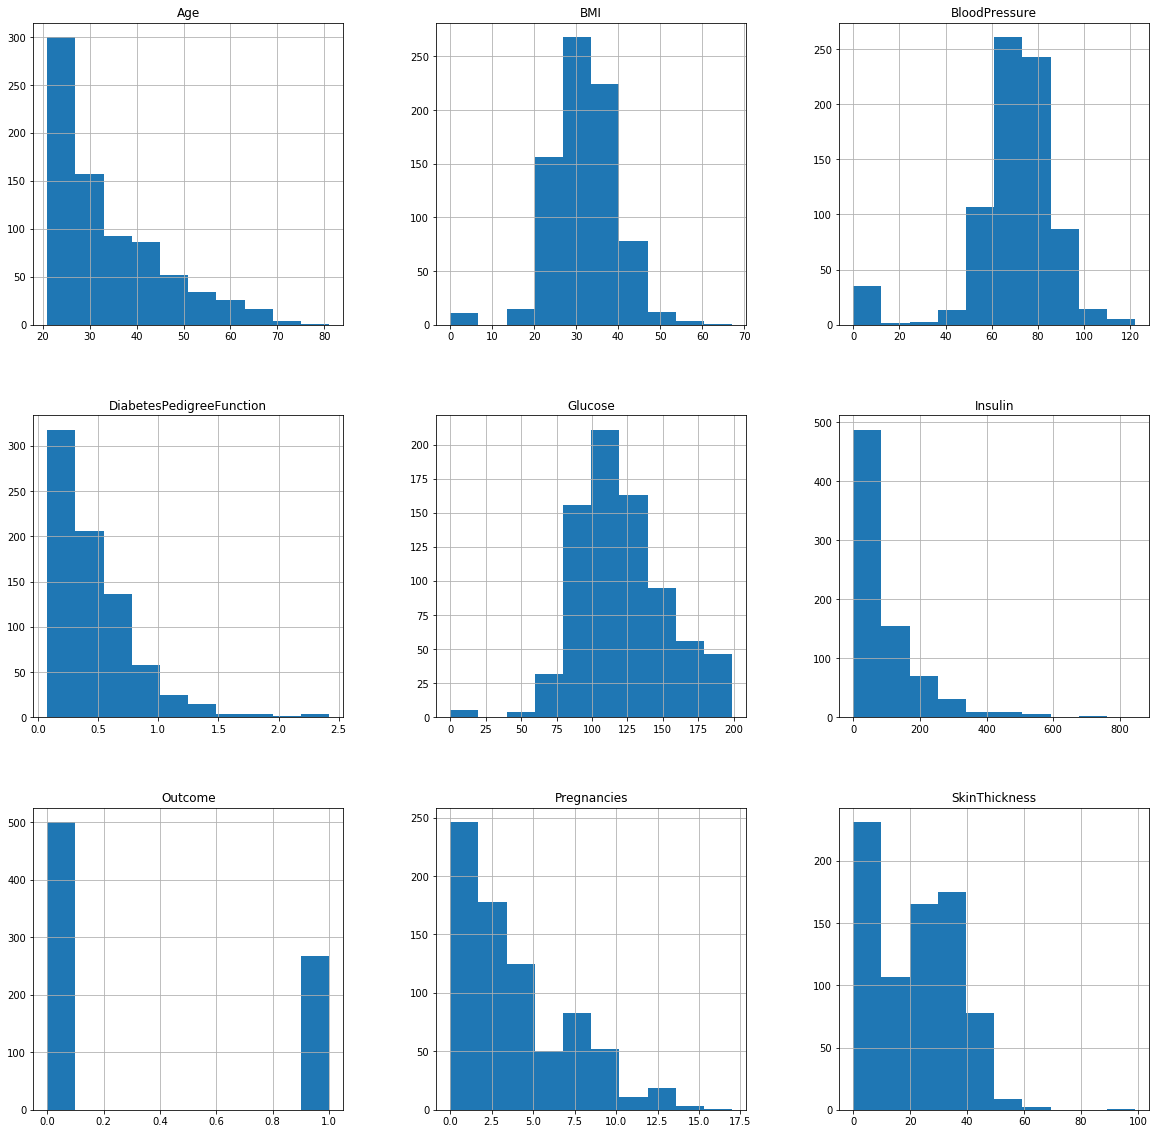

In [9]:
hplot=df.hist(figsize=(20,20))

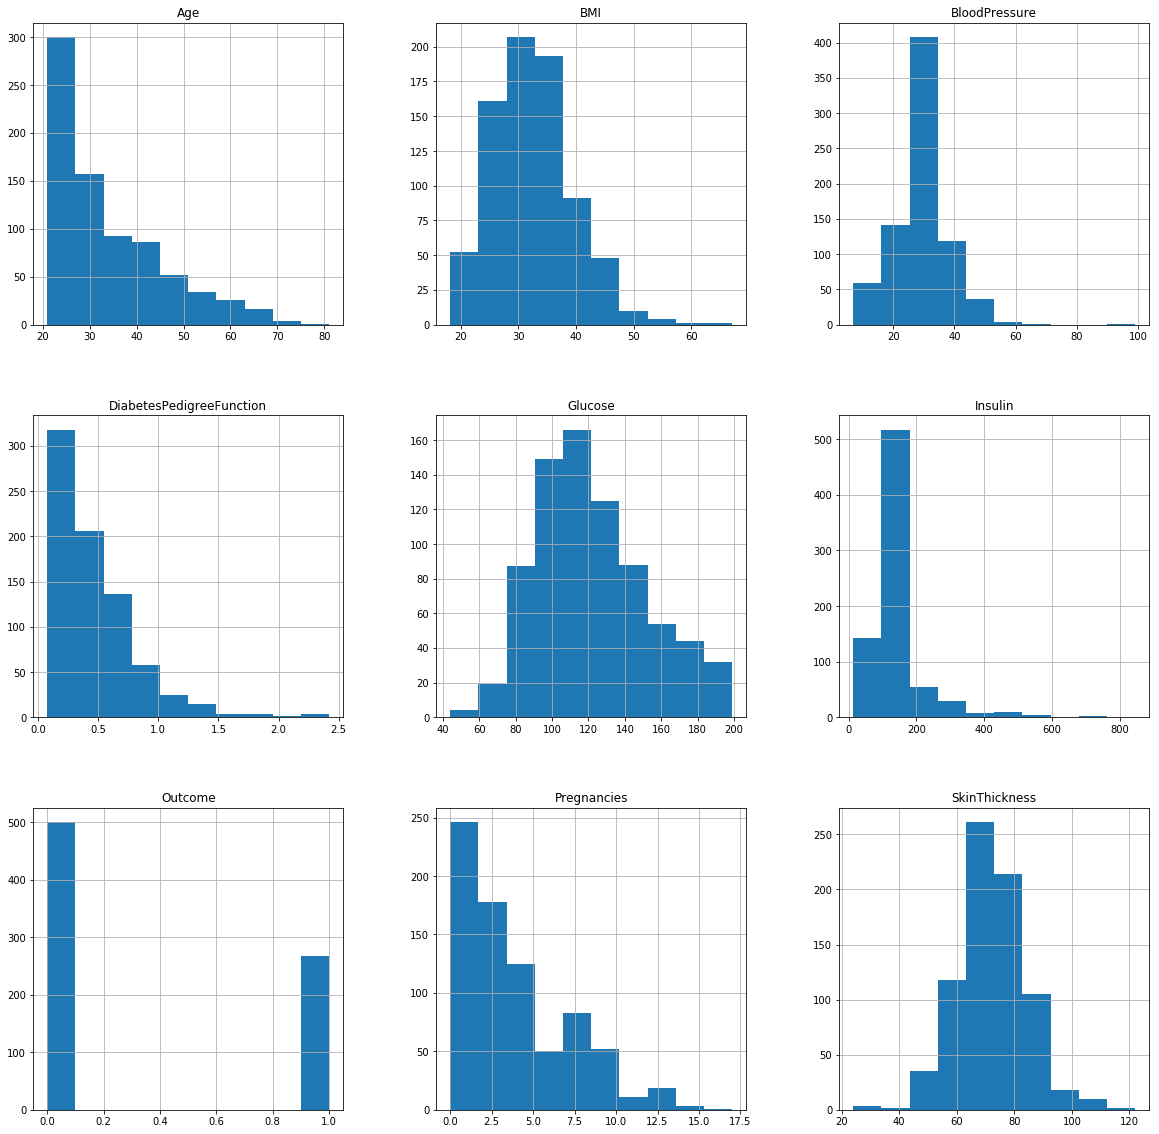

In [10]:
df_copy['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)
hplot=df_copy.hist(figsize=(20,20))

In [11]:
print(df.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


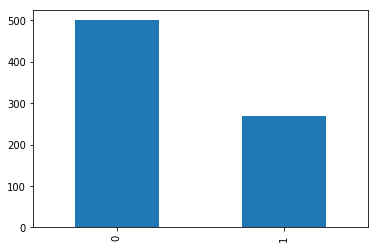

In [12]:
df.Outcome.value_counts().plot(kind="bar")

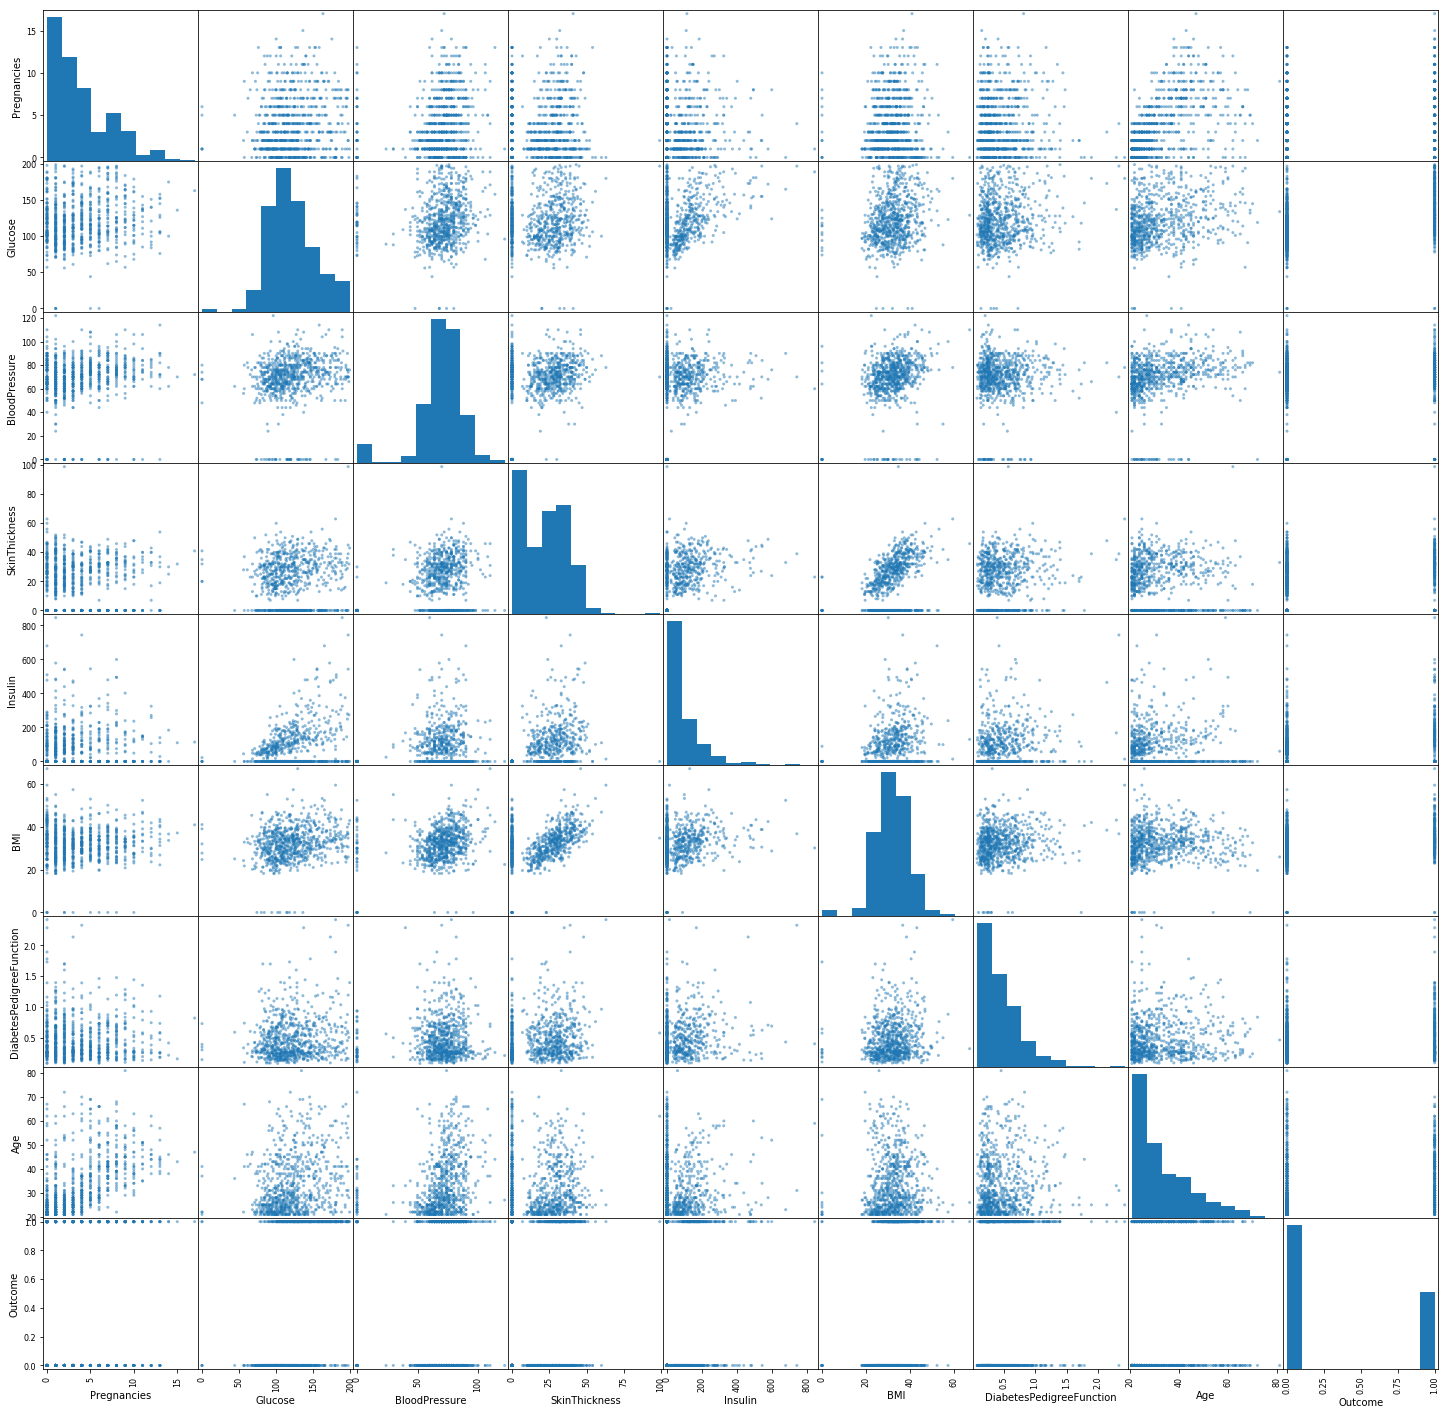

In [13]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25,25))

LinAlgError: singular matrix

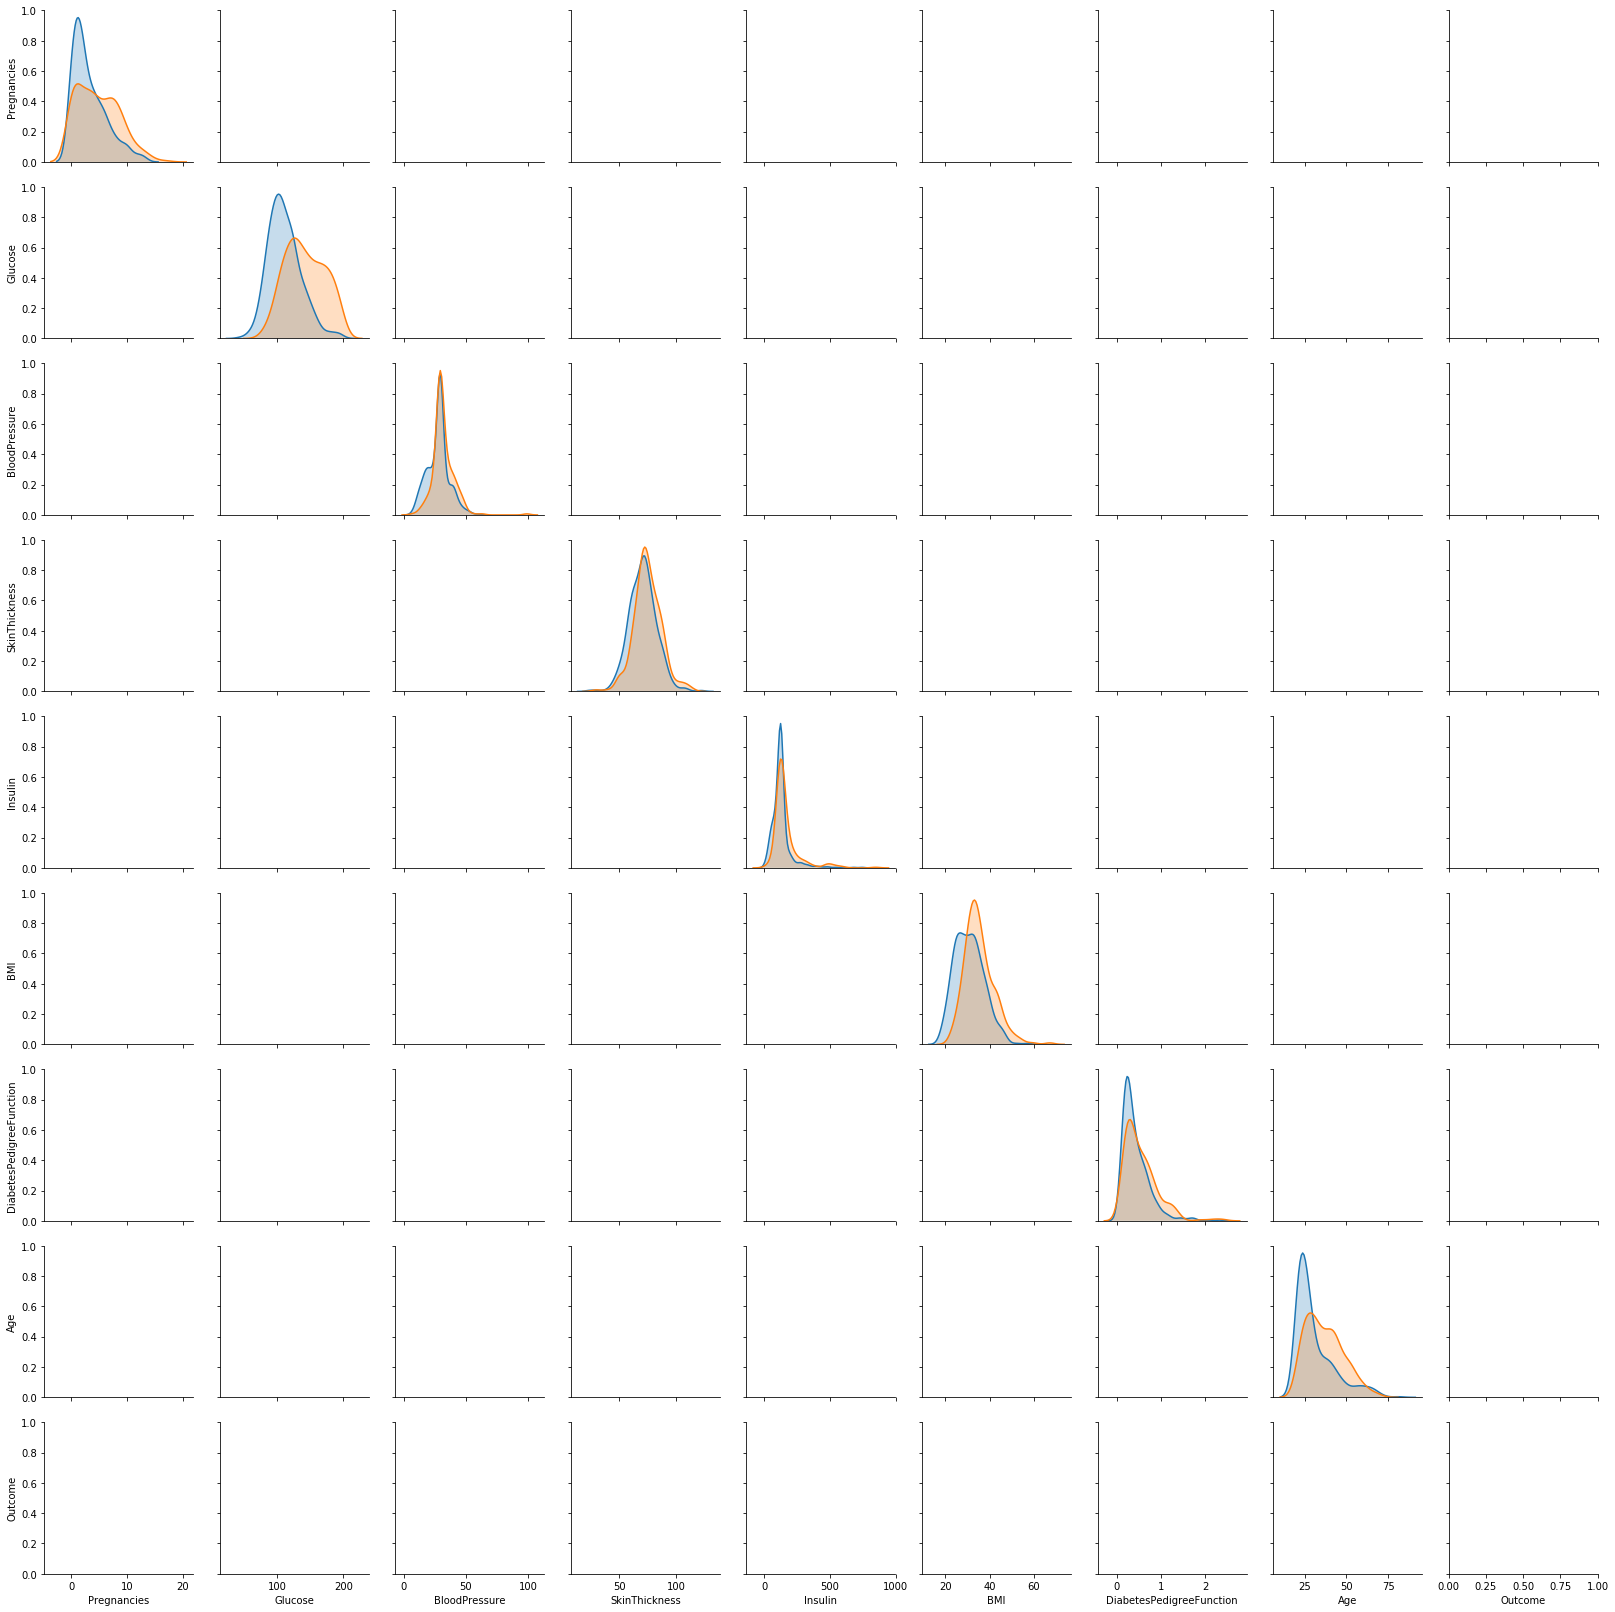

In [16]:
p=sns.pairplot(df_copy,hue='Outcome')

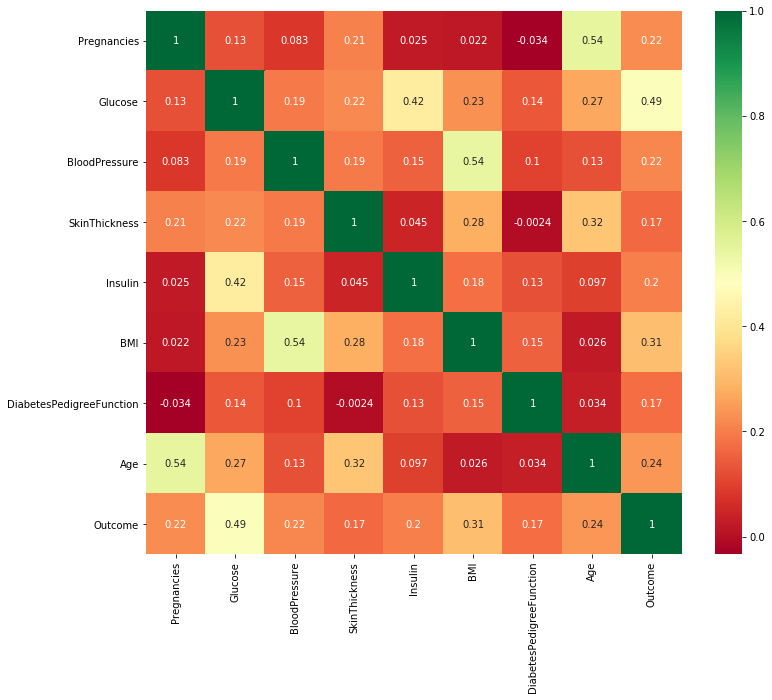

In [17]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df_copy.corr(),annot=True,cmap='RdYlGn')

In [21]:
from sklearn.preprocessing import StandardScaler
scale_X=StandardScaler()
X=scale_X.fit_transform(df_copy.drop(["Outcome"],axis=1))
X=pd.DataFrame(X,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,6.655021e-01,-0.031990,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205989,-1.746338e-02,-0.528319,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015979,8.087936e-16,-0.693761,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074480,-7.004289e-01,-0.528319,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503626,6.655021e-01,-2.679076,0.316566,1.549303,5.484909,-0.020496


In [45]:
from sklearn.preprocessing import MinMaxScaler
scale_X=MinMaxScaler()
X=scale_X.fit_transform(df_copy.drop(["Outcome"],axis=1))
X=pd.DataFrame(X,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [46]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.304348,0.489796,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.239130,0.428571,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.240798,0.408163,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.173913,0.428571,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.304348,0.163265,0.185096,0.509202,0.943638,0.200000


In [47]:
y=df_copy.Outcome
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
testing_score=[]
training_score=[]
for i in range(1,100):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    training_score.append(knn.score(X_train,Y_train))
    testing_score.append(knn.score(X_test,Y_test))

In [49]:
max_training_score=max(training_score)
train_scores_ind=[i for i,v in enumerate(training_score) if v==max_training_score]
print('Max training score {} % and k={}'.format(max_training_score*100,list(map(lambda x: x+1,train_scores_ind))))


Max training score 100.0 % and k=[1]


In [50]:
max_testing_score=max(testing_score)
test_scores_ind=[i for i,v in enumerate(testing_score) if v==max_testing_score]
print('Max testing score {} % and k={}'.format(max_testing_score*100,list(map(lambda x: x+1,test_scores_ind))))


Max testing score 76.171875 % and k=[17, 19, 20, 21, 24, 44]


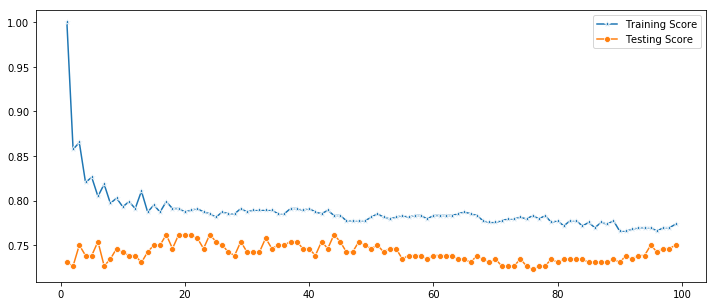

In [51]:
plt.figure(figsize=(12,5))
pplot = sns.lineplot(range(1,100),training_score,marker='*',label='Training Score')
pplot=sns.lineplot(range(1,100),testing_score,marker='o',label='Testing Score')